## 8.5 Keras高层接口
### 1、tf.keras.Model类
 (1) compile方法
 
 compile方法用于配置训练神经网络的损失函数、优化器及衡量指标等，函数原型如下：

In [ ]:
model.compile(
    optimizer='rmsprop'    #设置优化器，可以是字符串如 “adam”，也可以是实例化形式，如：tf.keras.optimizers.Adam (lr = 学习率，decay = 学习率衰减率)；
    loss=None,  #损失函数字符串或损失函数实例或损失计算的函数，用于指定损失函数，有以下三种方式：
            # ①字符串："adam"
            #②实例：tf.keras.losses.MeanSquareError;
            #③计算函数：tfmath.reduce mean(tfimath.reduce sum(tf.math.square (error)))
    metrics=None,   #训练和测试过程中评估的指标列表，如：metrics=[‘accuracy’]，metrics=['categorical_accuracy’],metrics=[‘sparse_categorical_accuracy’]
                #也可以使用字典组合方式，针对神经网络有多个输出的情况：metrics= {‘output_a’:'accuracy', 'output_b': ['accuracy', 'mse']}
    loss_weights=None,  #可选的列表或字典数据，指定标量系数衡量不同模型输出的损失贡献度
    sample_weight_mode=None, 
    weighted_metrics=None,
    target_tensors=None,
    distribute=None,
    **kwargs
)

(2) fit方法

Keras训练模型时通过fit函数可以指定训练次数，保存训练参数等，函数原型如下：

In [ ]:
model.fit (
    x=None,          #输入
    y=None,          #输出
    batch_size=None, #每个batch大小
    epochs=1,        #迭代次数
    verbose=1,       #0:不输出信息；1:显示进度条(一般默认为1)；2:每个epoch输出一行记录
    callbacks=None,  #在每个training/epoch/batch结束时，可以通过回调函数Callbacks查看一些内部信息。
    validation_split=0.0,  #(0,1)的浮点数，分割数据当验证数据，其它当训练数据
    validation_data=None,  #指定验证数据，该数据将覆盖validation_spilt设定的数据
    shuffle=True,          #是否在每轮迭代之前混洗数据
    class_weight= None, 
    sample_weight=None, 
    initial_epoch=0, 
    steps_per_epoch=None,
    validation_steps=None, 
    validation_freq=1, 
    max_queue_size=10, 
    workers=1,             #最大线程数
    use_multiprocessing=False, #是否用多线程
    **kwargs
)

(3) predict方法

predict用于载入模型数据，对输入的数据进行预测，获取神经网络的预测值，函数原型如下：

In [ ]:
model.predict(
    x,                #输入数据
    batch_size=None,  #批量数据尺寸，默认值为32
    verbose=0,        #模型的输出日志格式，共有两个模式，即0和1
    steps=None,       #预测数据量
    callbacks=None,   #回调函数
    max_queue_size=10,#生成最大队列数量，默认为 10
    workers=1,        #最大线程数量
    use_multiprocessing=False    #是否使用多线程
)


### 2、tf.keras.Sequential类

Sequential继承Model类，因此Model类具备的方法Sequential类均可使用。Sequential 是针对具有单一输出的神经网络而生，通过add方法叠加建立神经网络层，方便、快捷。对于一般性的神经网络，使用序列化方式即可完成神经网络的新建、训练、保存和预测全生命周期。

### 3、tf.keras.layers.Dense 类

Dense类用于神经网络层二维矩阵的计算。
Dense还应用于卷积神经网络的全连接层二维矩件数据的计算(除了batch）初始化方法如下：


In [ ]:
tf.keras.layers.Dense(
    units,                                 # 正整数，该层神经元个数  
    activation=None,                       # 激活函数，不指定则没有
    use_bias=True,                         # 布尔值，是否使用偏移向量
    kernel_initializer='glorot_uniform',   # 权重矩阵的初始化方法
    bias_initializer='zeros',              # 偏置向量的初始化方法
    kernel_regularizer=None,               # 正则化函数应用于核权矩阵
    bias_regularizer=None,                 # 应用于偏差向量的正则化函数
    activity_regularizer=None,             # 输出的规范化方法
    kernel_constraint=None,                # 权重变化 限制函数
    bias_constraint=None, **kwargs         # 偏置值 变化 限制函数
)

### 4、tf.keras.layers.Conv2D类

Conv2D用于搭建卷积神经网络，并进行卷积计算，Keras高度封装类Conv2D，通过初始化参数即可实现卷积计算。初始化参数如下：

In [ ]:
tf.keras.layers.Conv2D(
    filters, # 卷积核数目
    kernel_size, # 卷积核的大小
    strides(1,1), # 步长，默认横纵向滑动步长均为1(1,1)
    padding='valid', # 边界处理，当padding = 'same’时，全零填充，当padding = ‘valid’，则不需要填充
    data_format=None,#输入数据的格式
    dilation_rate=(1,1),
    activation=None, # 激活函数
    use_bias=True, #是否使用偏置量,布尔值
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None)

### 5、tf.keras.layers.MaxPooling2D类

最大池化层是卷积神经网络中常用的数据提取方法，Keras的最大池化类之一为MaxPooling2D，通用功能的另一个类为MaxPoo12D，都可以实现数据的特征提取。初始化参数如下：

In [ ]:
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), #窗口大小
    strides=None,     #移动步长的意思 ，默认是池化核尺寸，即2
    padding='valid',
    data_format=None,
    * * kwargs
)


### 6、tf.keras.layers.Flatten类
Flatten是连接卷积层与全连接层的过渡层，Flatten类的作用是将上一层神经网络数据“拉伸”为列向量，保持参数不变，只改变数据维度，作为全连接层的输入。Flaten类的初始化如下：


__init__{
data_format=None,
**kwargs
}

### 搭建神经网络


使用Keras 搭建普通神经网络有 4 种方式：①使用 Model类逐层建立网络结构；②使用继承Model类建立神经网络；③使用Sequential内置序列化搭建网络结构；④使用 Sequential外置序列化搭建网络结构。

* 1、Model类搭建网络
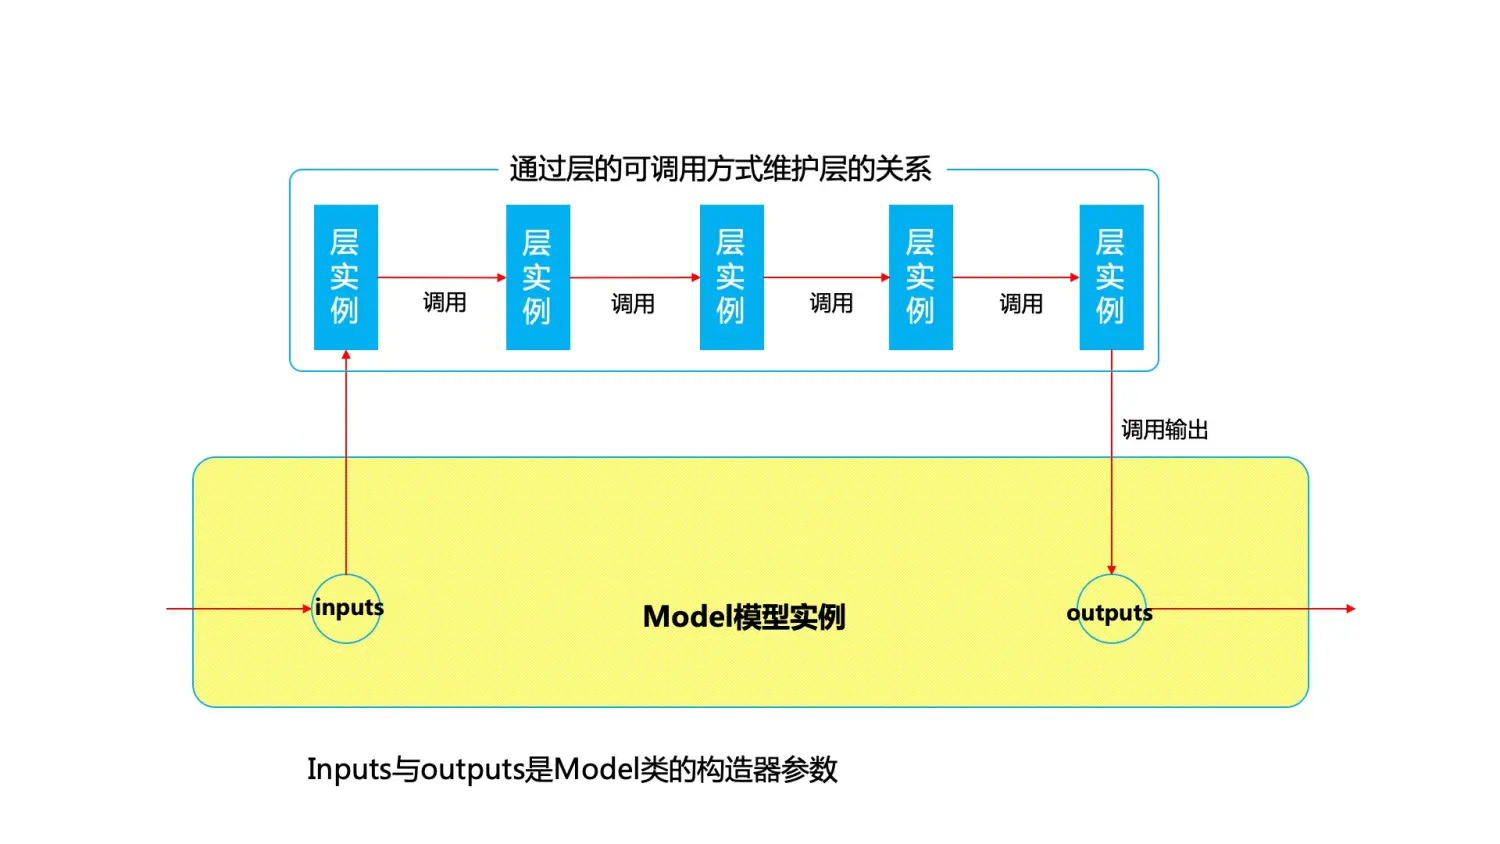

In [ ]:

def line_fit_model():
    """Model搭建神经网络结构
    参数:
        无
    返回:
        model: 网络类实例
    """
	#1、定义层
    # 输入层
   
    # 隐藏层-1

    # 隐藏层-2

    # 输出层

    
    #2、构建Layer之间的函数链式关系
   

    # 3、实例化, 使用inputs与outputs建立函数链式模型
    
    # 展示网络结构

    return model

if __name__ == "__main__":
    line_fit_model()

In [ ]:
# 鸢尾花数据集案例
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
import sklearn.datasets as datasets
#1、创建网络模型
def fitLine():
    # 输入层

    # 隐藏层-1

    # 隐藏层-2

    # 输出层

    # 实例化

    return model
if __name__ == "__main__":
    #2、生成模型实例

    # 3、训练
    # 3.1训练参数

    # 3.2开始训练
    
    #verbose日志展示，ｓｈｕｆｆｌｅ＝ｔｒｕｅ每轮先打乱数据
    # 4.预测
   
    #5.评估


* 2、继承Model类搭建神经网络

Model是Keras的神经网络基础类，可以使用类继承的方式自定义神经网络。实现代码如下：

In [7]:
# 引入Tensorflow框架
import tensorflow as tf 
# 引入keras
from tensorflow import keras
# 引入keras层结构
from tensorflow.keras import layers 

class Linefit(tf.keras.Model):
    """类继承方式搭建神经网络
    参数:
        tf.keras.Model: Model父类
    返回:
        无
    """
    def __init__(self):
        # 继承
        super(Linefit, self).__init__()
        # 隐藏层-1
        self.layer1 = layers.Dense(10, activation=tf.nn.relu, name="layer1")
        # 隐藏层-2
        self.layer2 = layers.Dense(15, activation=tf.nn.relu, name="layer2")
        # 输出层
        self.outputs = layers.Dense(5, activation=tf.nn.softmax, name="outputs")
    @tf.function
    def call(self, inputs):
        """实例回调接口，类似重载()
        参数:
            self: 对象
            inputs: 输入数据
        返回:
            输出层张量
        """
        layer1 = self.layer1(inputs)
        layer2 = self.layer2(layer1)
        return self.outputs(layer2)
if __name__ == "__main__":
    inputs = tf.constant([[1]])
    model = Linefit()
    model(inputs)
    model.summary()


Model: "linefit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              multiple                  20        
                                                                 
 layer2 (Dense)              multiple                  165       
                                                                 
 outputs (Dense)             multiple                  80        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


* 3、Sequential内置序列搭建神经网络

Keras 提供了序列化搭建神经网络的类Sequential，通过Sequential可以搭建具有单一输出的神经网络。实现代码如下:


In [8]:
# 引入Tensorflow框架
import tensorflow as tf 
# 引入keras
from tensorflow import keras
# 引入keras层结构
from tensorflow.keras import layers 

def line_fit_sequential():
    """Sequential内置序列化搭建网络结构
    参数:
        无
    返回:
        model: 网络类实例
    """
    model = tf.keras.Sequential([
        # 隐藏层-1
        layers.Dense(10, activation="relu", input_shape=(1,), name="layer1"),
        # 隐藏层-2
        layers.Dense(15, activation="relu", name="layer2"),
        # 输出层
        layers.Dense(5, activation="softmax", name="outputs")
    ])
    # 展示网络结构
    model.summary()
    return model
if __name__ == "__main__":
    line_fit_sequential()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                20        
                                                                 
 layer2 (Dense)              (None, 15)                165       
                                                                 
 outputs (Dense)             (None, 5)                 80        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


* 4、Sequential外置搭建神经网络

下面使用Sequential类的add方法搭建神经网络的结构与内建方法相同

In [ ]:
# 引入Tensorflow框架
import tensorflow as tf 
# 引入keras
from tensorflow import keras
# 引入keras层结构
from tensorflow.keras import layers 

def line_fit_squential_add():
    """Sequential外置序列化搭建网络结构
    参数:
        无
    返回:
        model: 类实例
    """
    # Sequential实例化
    model = tf.keras.Sequential()
    # 添加隐藏层-1
    model.add(layers.Dense(10, activation=tf.nn.relu, input_shape=(1,), name="layer1"))
    # 添加隐藏层-2
    model.add(layers.Dense(15, activation=tf.nn.relu, name="layer2"))
    # 添加输出层
    model.add(layers.Dense(5, activation=tf.nn.softmax, name="outputs"))
    # 展示网络结构
    model.summary()
    return model

if __name__ == "__main__":
    line_fit_squential_add()
